<a href="https://colab.research.google.com/github/BramanTyamahedrawan/PCVK-Pertemuan-11/blob/main/Praktikum_Pertemuan_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NAMA     : BRAMAN TYAMAHENDRAWAN**

**KELAS    : TI-3C**

**NIM      : 2141720097**

# 1. import beberapa library dan akses folder yang ada di Drive Anda dengan

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# 2. Implementasikan 6 metode template matching pada OpenCV dengan menggunakan

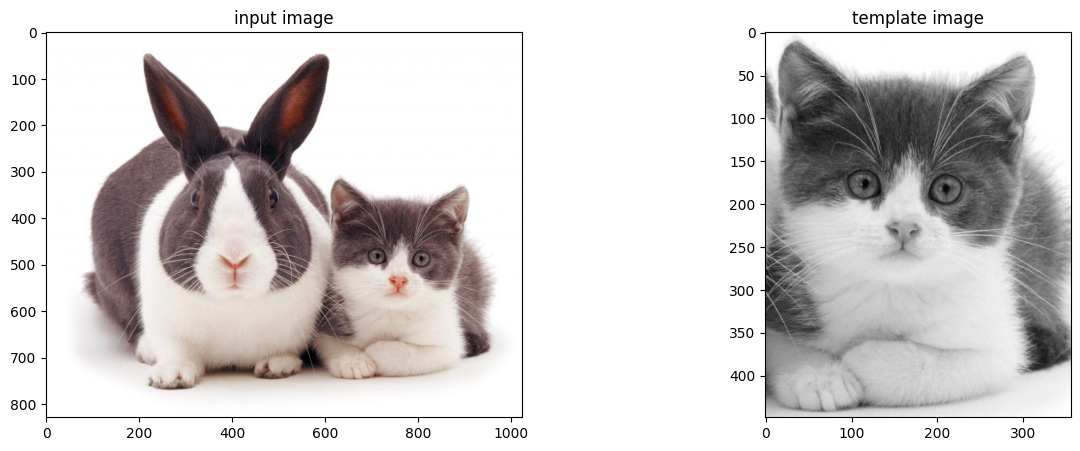

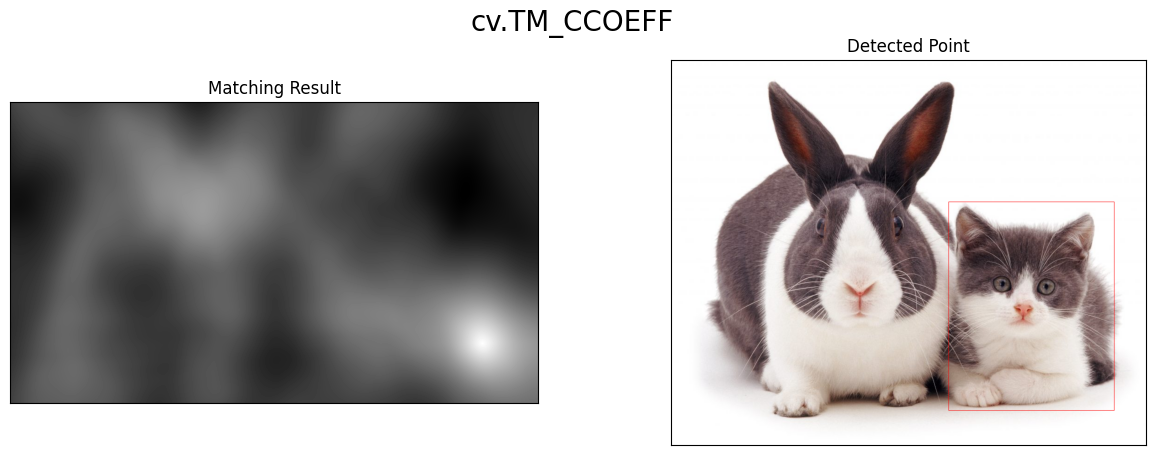

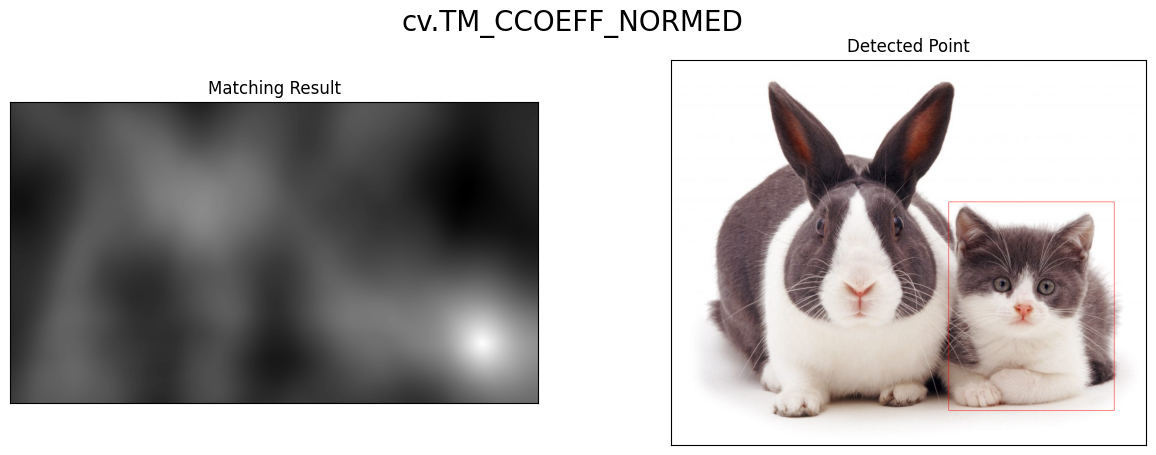

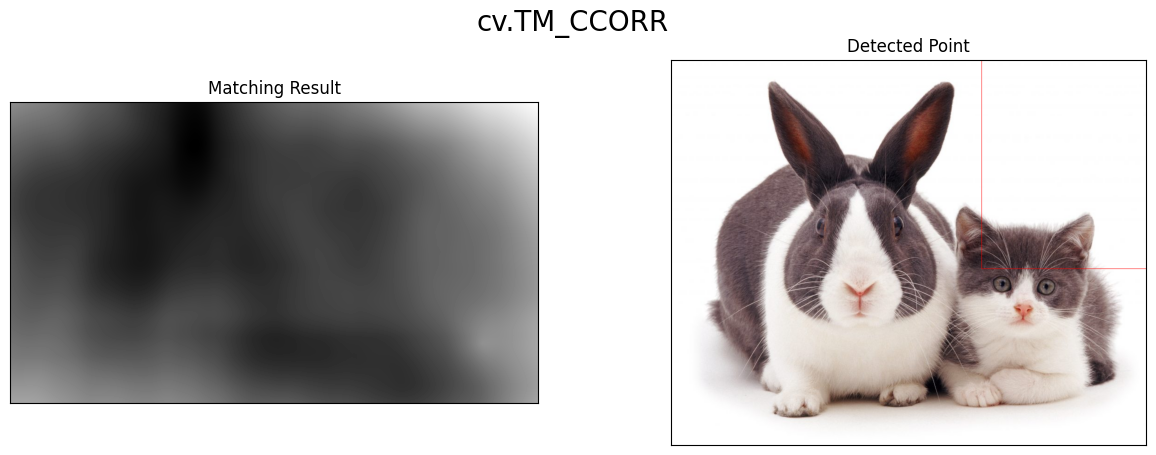

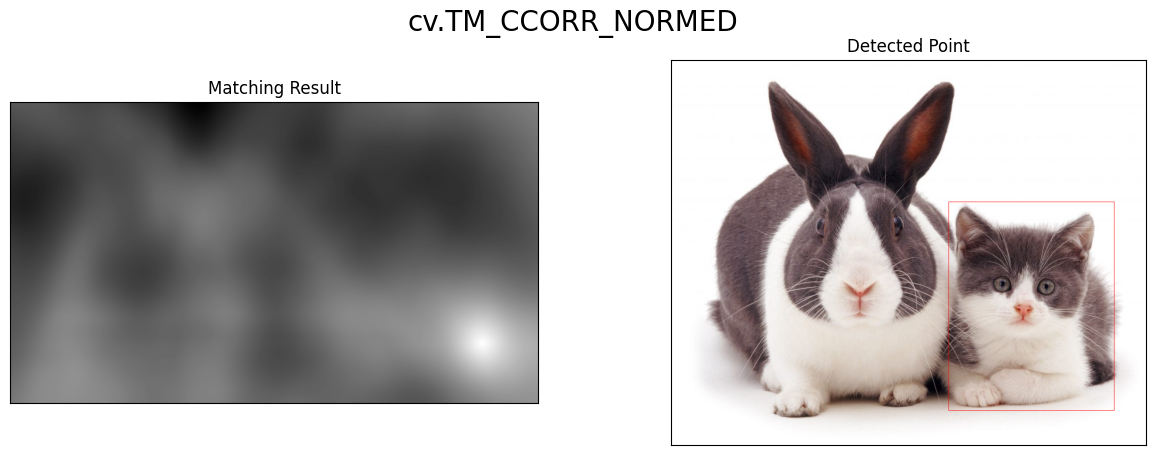

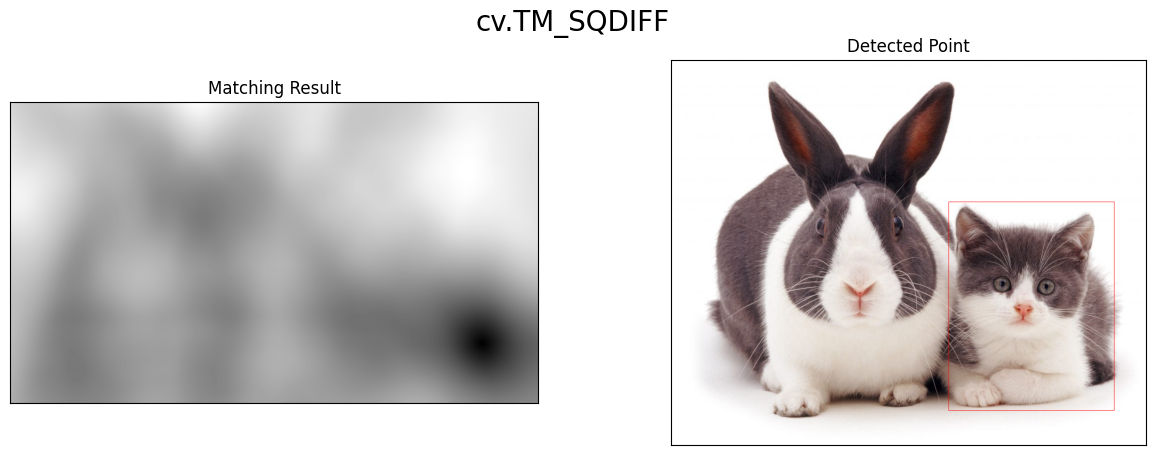

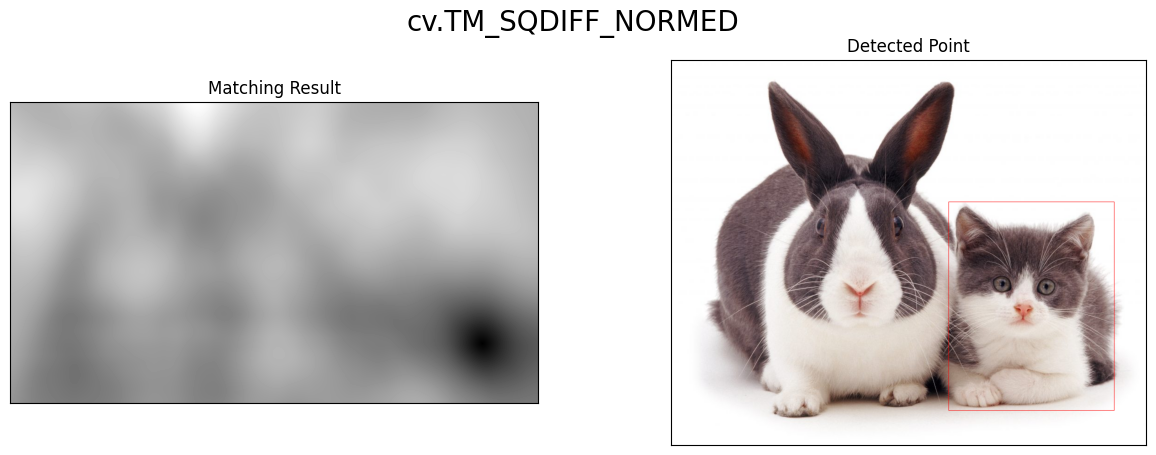

In [ ]:
# load citra input
img = cv.imread('/content/drive/MyDrive/PCVK/Object Detection/cats_and_bunnies.jpg')
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img2 = img.copy()

#load citra template
template = cv.imread('/content/drive/MyDrive/PCVK/Object Detection/cat2_templatejpg.jpg',0)
# dimensi citra
w, h = template.shape[::-1]

# print input image dan template
f, axarr = plt. subplots(1,2,figsize=(15,5)) #membuat 2 plot untuk citra input dan template
axarr[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)), axarr[0].set_title("input image")
axarr[1].imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB)), axarr[1].set_title("template image")

# All the 6 methods for comparison in a list
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv.matchTemplate(img_gray,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv.rectangle(img,top_left, bottom_right,(0,0,255))
    plt.figure(figsize=(15,5))
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    print("\n\n")
    plt.suptitle(meth, fontsize=20)
    plt.show()

# 3. Implementasikan konsep template matching tanpa menggunakan library OpenCV

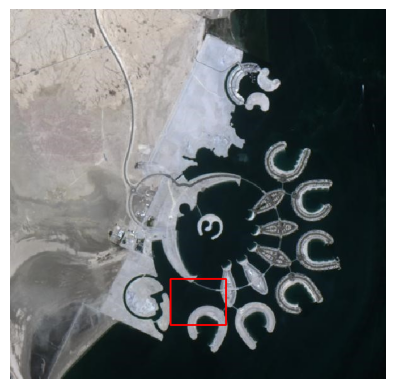

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Baca citra masukan dan citra template
input_image = np.array(Image.open('/content/drive/MyDrive/PCVK/Object Detection/bahrain.jpg'))
template_image = np.array(Image.open('/content/drive/MyDrive/PCVK/Object Detection/bahrain-template.jpg'))

# Dapatkan ukuran citra masukan dan citra template
input_height, input_width, _ = input_image.shape
template_height, template_width, _ = template_image.shape

# Buat citra output dengan ukuran yang sesuai
output_image = np.zeros((input_height, input_width))

# Lakukan template matching
for y in range(input_height - template_height):
    for x in range(input_width - template_width):
        # Pilih bagian citra dari citra masukan yang sesuai dengan ukuran citra template
        region_of_interest = input_image[y:y + template_height, x:x + template_width]

        # Hitung nilai cross-correlation antara citra template dan region_of_interest
        correlation = np.sum(template_image * region_of_interest)

        # Simpan nilai cross-correlation ke citra output
        output_image[y, x] = correlation

# Temukan posisi terbaik (maksimum) dalam citra output
max_position = np.unravel_index(np.argmax(output_image), output_image.shape)

# Gambarkan kotak pada citra masukan untuk menandai hasil template matching
output_image_with_box = input_image.copy()
cv2.rectangle(output_image_with_box, (max_position[1], max_position[0]),
              (max_position[1] + template_width, max_position[0] + template_height),
              (255, 0, 0), 2)

# Tampilkan citra masukan dengan kotak hasil template matching
plt.imshow(output_image_with_box)
plt.axis('off')
plt.show()


# 4. Implementasikan metode Sobel Edge Detection, Canny Edge Detection, dan LaplacianEdge Detection pada OpenCV dengan menggunakan gambar car-park.jpg, sehingga menghasilkan luaran sebagai berikut:
*   Sobel Edge Detection
*   Canny Edge Detection
*   Laplacian Edge Detection

(<Axes: >, <matplotlib.image.AxesImage at 0x7d3c50099420>)

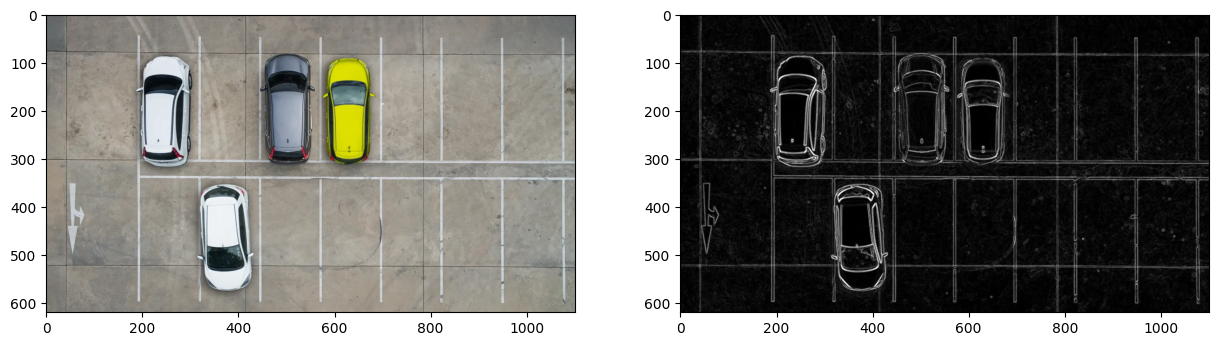

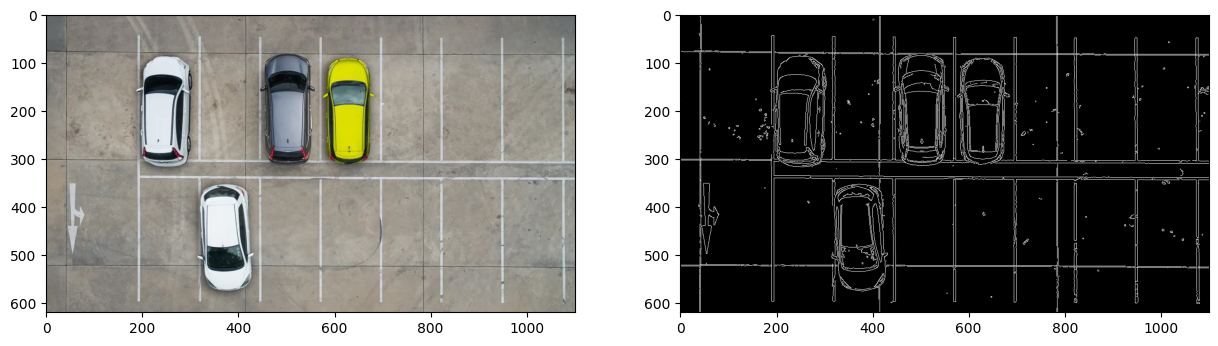

In [ ]:
img0 = cv.imread('/content/drive/MyDrive/PCVK/Object Detection/car-park.jpg')

# converting to gray scale
gray = cv.cvtColor(img0, cv.COLOR_BGR2GRAY)

# remove noise
imgg = cv.GaussianBlur(gray,(3,3),0)

# obtaining a horizontal and vertical Sobel filtering of the image
img_sobelx = cv.Sobel(imgg, cv.CV_64F, 1, 0, ksize=3)
img_sobely = cv.Sobel(imgg, cv.CV_64F, 0, 1, ksize=3)

# image with both horizontal and vertical Sobel kernels applied
img_sobelxy = cv.addWeighted(cv.convertScaleAbs(img_sobelx), 0.5, cv.convertScaleAbs(img_sobely), 0.5, 0)

# Sobel Edge Detection
f, axarr = plt. subplots(1,2,figsize=(15,5))
plt.subplot(121),plt.imshow(cv.cvtColor(img0, cv.COLOR_BGR2RGB))
axarr[0].imshow(cv.cvtColor(img0, cv.COLOR_BGR2RGB))
plt.subplot(122),plt.imshow(img_sobelxy,cmap = 'gray')


# b. Canny Edge Detection

edged = cv.Canny(img0, 100, 200)

# Plot outputs
f, axarr = plt.subplots(1,2,figsize=(15,5))
plt.subplot(121), plt.imshow(cv.cvtColor(img0, cv.COLOR_BGR2RGB))
axarr[0].imshow(cv.cvtColor(img0, cv.COLOR_BGR2RGB))
plt.subplot(122), plt.imshow(edged, cmap = 'gray')

# 5. Implementasikan metode Harris Corner Detection dan Shi-Tomasi Detection pada

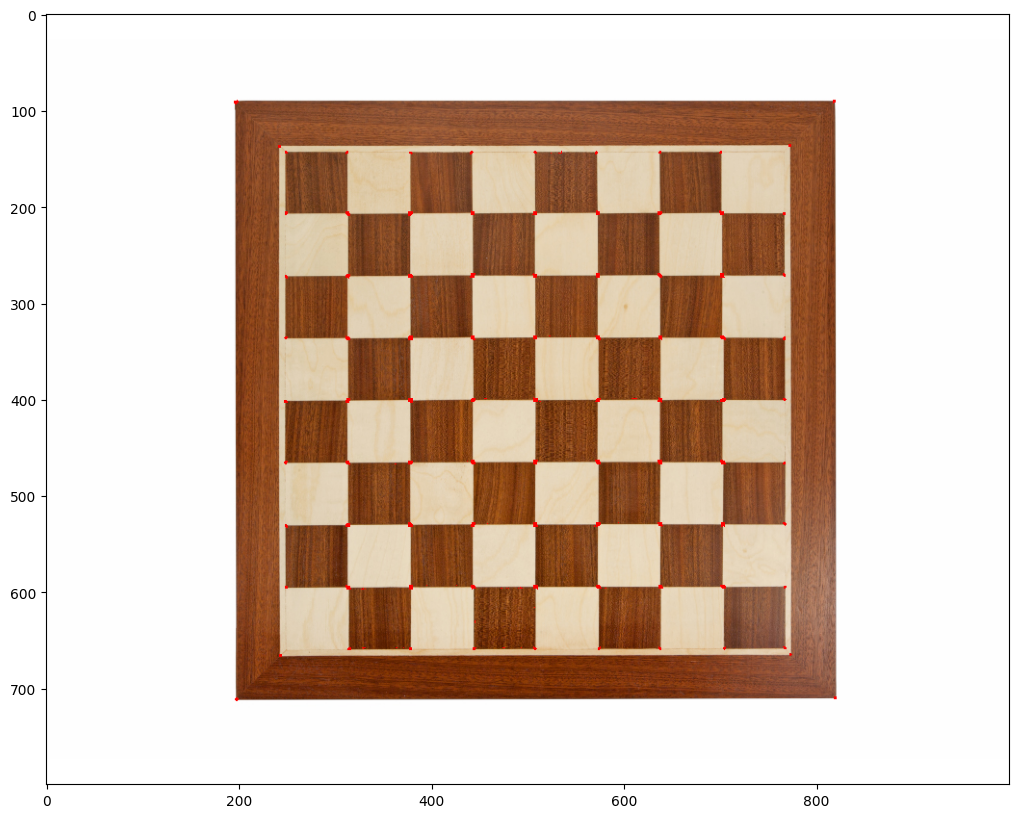

In [ ]:
# Nomor 4 (a)

import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

#load citra input
input_img = cv.imread('/content/drive/MyDrive/PCVK/Object Detection/chess-board.jpg')
gray_img = cv.cvtColor(input_img, cv.COLOR_BGR2GRAY)
dst = cv.cornerHarris(gray_img,3,1,0.04)

gray_img = np.float32(gray_img)
harris_output = cv.cornerHarris(gray_img,2,3, 3)
#hasil harris corner dilakukan dilasi untuk menandai sudut
harris_output = cv.dilate(harris_output, None)

#Threshold untuk mengoptimalkan nilai
input_img[dst>0.01*dst.max()]=[0,0,255]

plt.figure(figsize=(20,10))
plt.imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB))

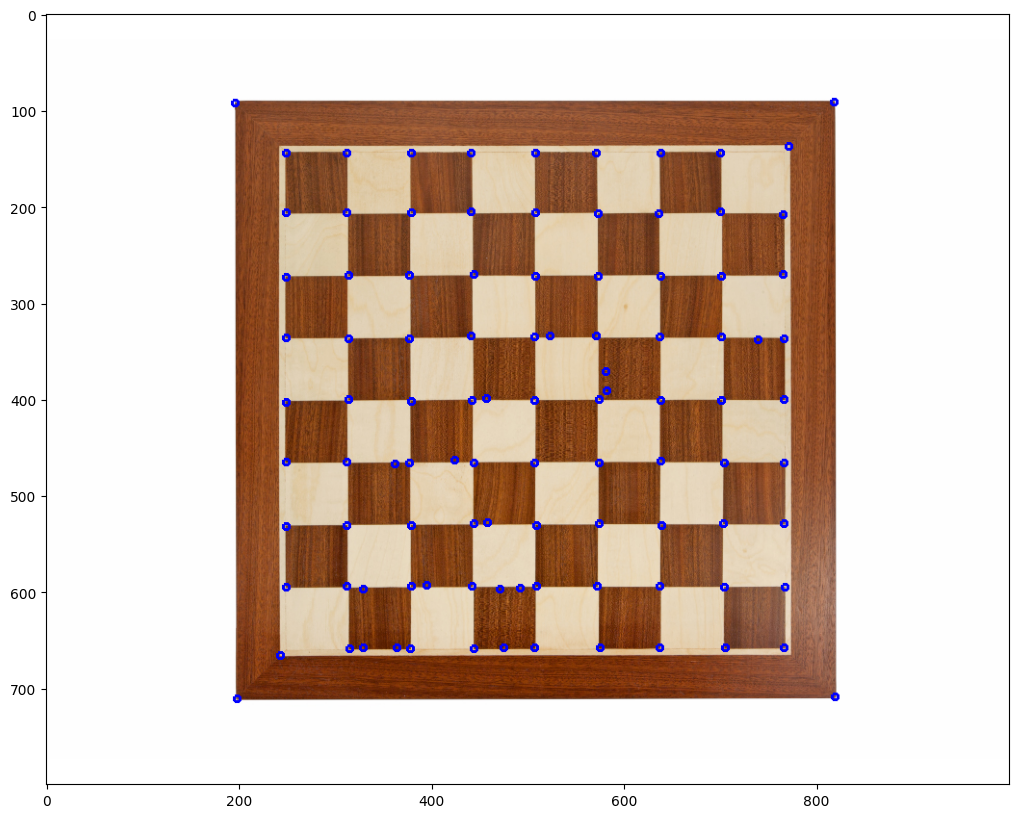

In [ ]:
# Nomor 4 (b)
input_img = cv.imread('/content/drive/MyDrive/PCVK/Object Detection/chess-board.jpg')
gray_img = cv.cvtColor(input_img, cv.COLOR_BGR2GRAY)

corners = cv.goodFeaturesToTrack(gray_img, 100,0.01,10)
corners = np. int0(corners)
for i in corners:
    x,y = i.ravel()
    cv.circle(input_img, (x,y),3,255,2)

plt.figure(figsize=(20,10))
plt.imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB))

# 6. Implementasikan metode Hough Transform pada OpenCV dengan menggunakan

number of Hough lines: 33
Number of filtered lines: 1
Number of filtered lines: 2
Number of filtered lines: 3
Number of filtered lines: 4
Number of filtered lines: 5
Number of filtered lines: 6
Number of filtered lines: 7
Number of filtered lines: 8
Number of filtered lines: 9
Number of filtered lines: 10
Number of filtered lines: 11
Number of filtered lines: 12
Number of filtered lines: 13
Number of filtered lines: 14
Number of filtered lines: 15
Number of filtered lines: 16
Number of filtered lines: 17
Number of filtered lines: 18
Number of filtered lines: 19
Number of filtered lines: 20
Number of filtered lines: 21
Number of filtered lines: 22
Number of filtered lines: 23
Number of filtered lines: 24
Number of filtered lines: 25
Number of filtered lines: 26
Number of filtered lines: 27
Number of filtered lines: 28
Number of filtered lines: 29
Number of filtered lines: 30
Number of filtered lines: 31
Number of filtered lines: 32
Number of filtered lines: 32


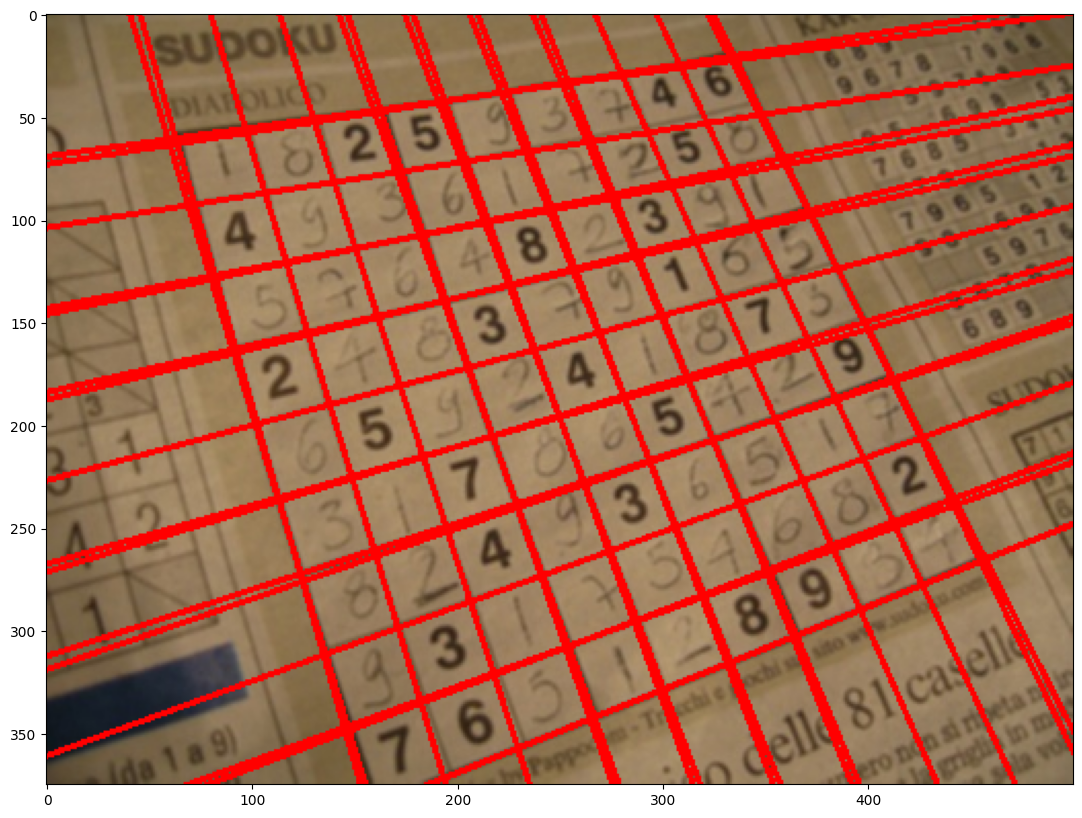

In [ ]:
input_img = cv.imread('/content/drive/MyDrive/PCVK/Object Detection/sudoku.jpg')
img_gray = cv.cvtColor(input_img, cv.COLOR_BGR2GRAY)

edges = cv.Canny (img_gray, 90, 150, apertureSize = 3)

kernel = np.ones((3,3), np.uint8)
edges = cv.dilate(edges,kernel,iterations = 1)

kernel = np.ones((5,5), np.uint8)
edges = cv.erode (edges, kernel, iterations = 1)

lines = cv.HoughLines(edges,1,np.pi/180,150)


if not lines.any():
    print('No lines were found')
    exit()

if filter:
    rho_threshold = 15
    theta_threshold = 0.1


    similar_lines = {i : [] for i in range(len(lines))}
    for i in range(len(lines)):
      for j in range (len (lines)):
        if i == j:
            continue

        rho_i, theta_i = lines[i][0]
        rho_j, theta_j = lines[j][0]
        if abs(rho_i - rho_j) < rho_threshold and abs (theta_i - theta_j) < theta_threshold:
            similar_lines[i].append(j)

    indices = [i for i in range(len(lines))]
    indices.sort(key=lambda x: len(similar_lines[x]))

    line_flags = len(lines) *[True]
    for i in range(len(lines) - 1):
        if not line_flags [indices[i]]:
            continue
    for j in range(i + 1, len(lines)):
            if not line_flags[indices[j]]:
                continue
            rho_i, theta_i = lines[indices[i]][0]
            rho_j, theta_j = lines[indices[j]][0]
            if abs(rho_i - rho_j) < rho_threshold and abs(theta_i - theta_j) < theta_threshold:
                line_flags [indices[j]] = False
    print('number of Hough lines:', len(lines))

    filtered_lines = []

    if filter:
        for i in range(len(lines)):
            if line_flags[i]:
                filtered_lines.append(lines[i])

            print('Number of filtered lines:', len(filtered_lines ))
    else:
        filtered_lines = lines

    for line in filtered_lines:
        rho, theta = line [0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))

        cv.line(input_img, (x1, y1), (x2,y2),(0,0,255),2)

    plt.figure(figsize=(20,10))
    plt.imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB))

# 7. Implementasikan fungsi findContours() pada OpenCV untuk contour detection dengan menggunakan gambar laptop.jpg, sehingga menghasilkan luaran sebagai berikut:

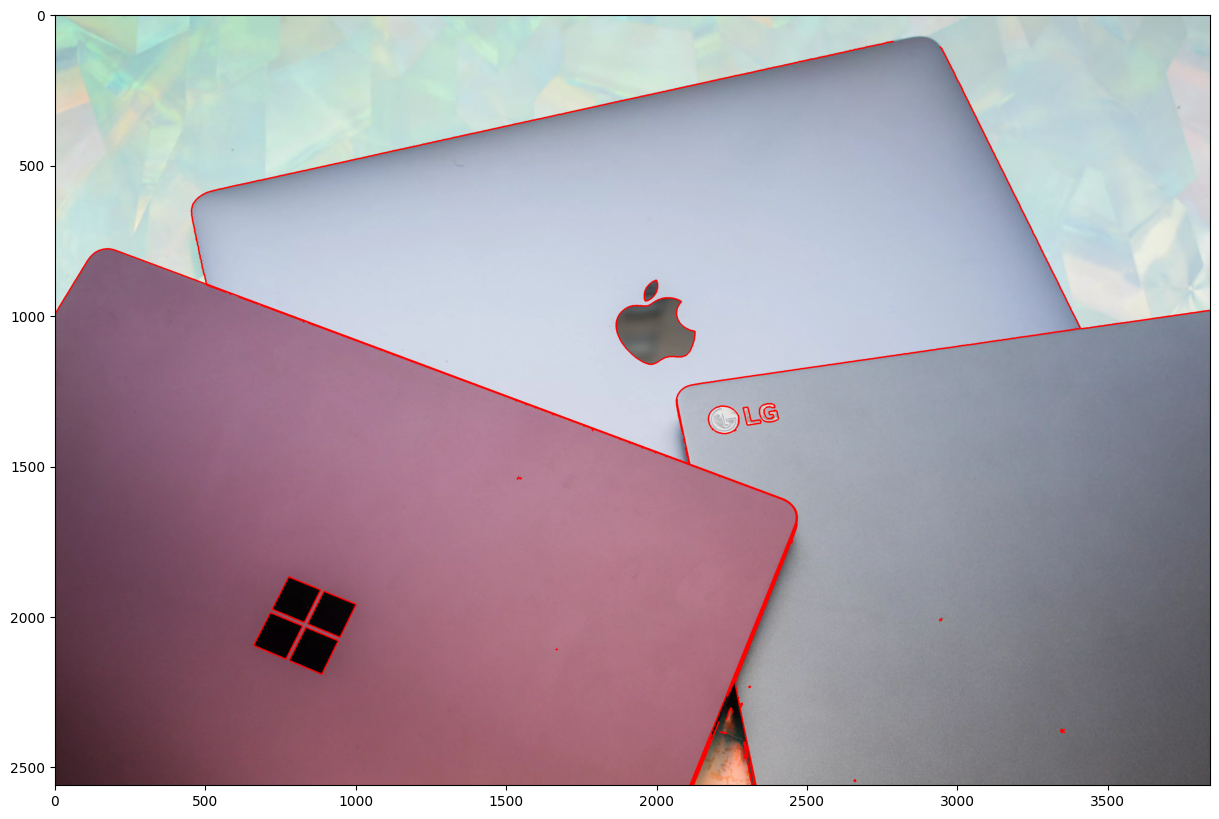

In [ ]:
img = cv.imread('/content/drive/MyDrive/PCVK/Object Detection/laptop.jpg')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

edged = cv.Canny(img_gray, 30, 200)

contours, hierarchy = cv.findContours(edged, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

cv.drawContours(img, contours, -1, (0,0,255), 3)

plt.figure(figsize=(20,10))
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))